# Main

In [181]:
from utils import *
import json

In [182]:
alpha = 0.05

# Componente Proporcional y Gradiente (P)
T_burnin =120 # número de pasos iniciales antes de considerar ajustes proporcionales dinámicos (P) o el modelo derivativo (D).
lr = 0.02 #  tasa de aprendizaje en el componente proporcional, modulando la sensibilidad del modelo a los errores.

# Componente Integral (I)
Csat = 2.5 # Escala la saturación en el componente integral, ajustando su contribución al cuantil.
KI = 1.0 # Modula la sensibilidad del término integral a la acumulación de errores.

# Componente Derivativo (D)
ahead = 1 # Número de pasos hacia adelante  utilizada por el modelo derivativo,
seasonal_period = 7 # Periodo de la estacionalidad a modelar


n_series=5
n_points=365*3
noise_std=5
fore_std=10

In [183]:
df = generar_datos(n_series=n_series, n_points=n_points, seed=123, start_date="2023-01-01",noise_std=noise_std, fore_std=fore_std)
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.4)


In [184]:
df_pdi, logs = apply_pdi_with_calibration_with_diagnostics(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET",
    # smooth_method ='last'
)

100%|██████████| 5/5 [00:12<00:00,  2.46s/it]


In [185]:
unique_keys = df_pdi['KEY'].unique()

# for key in unique_keys:
#     plot_series_results_with_sets(df_pdi, key=key)

In [186]:
# plot_logs(logs)

In [187]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)


Métricas por KEY (Calibración):
     Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0  SERIE_1           0.960784            0.010784            38.951218   
1  SERIE_2           0.951140            0.001140            40.776332   
2  SERIE_3           0.947883           -0.002117            38.140248   
3  SERIE_4           0.928105           -0.021895            39.723237   
4  SERIE_5           0.957516            0.007516            40.100341   

   Winkler Score  
0      49.210743  
1      46.533360  
2      43.678722  
3      54.521656  
4      48.011894  


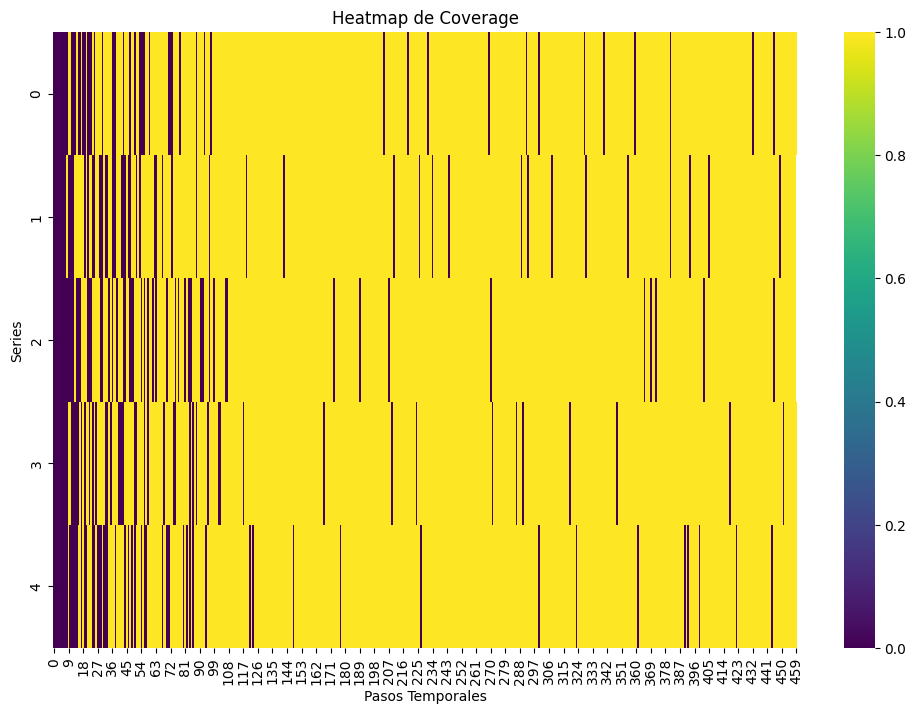

In [188]:
plot_heatmap(logs, component="coverage")

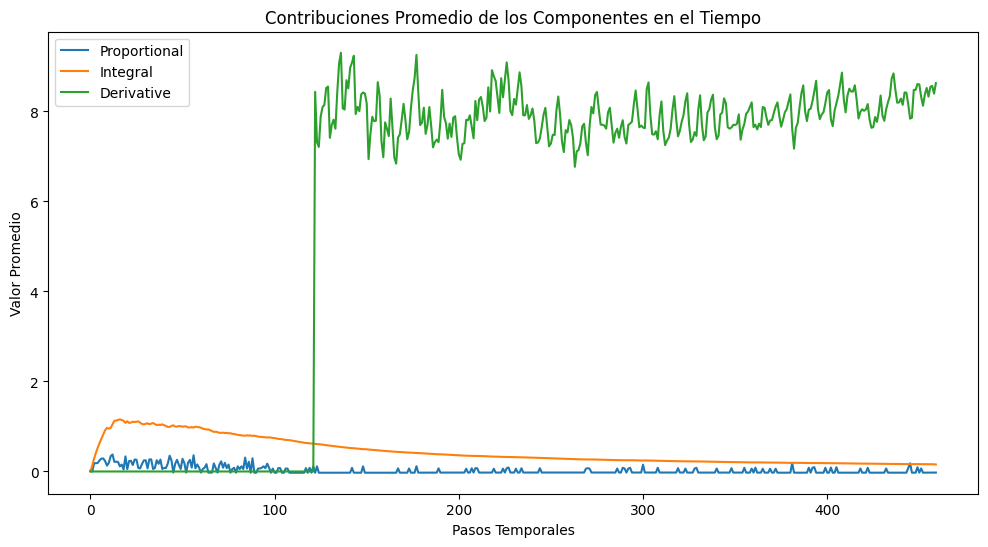

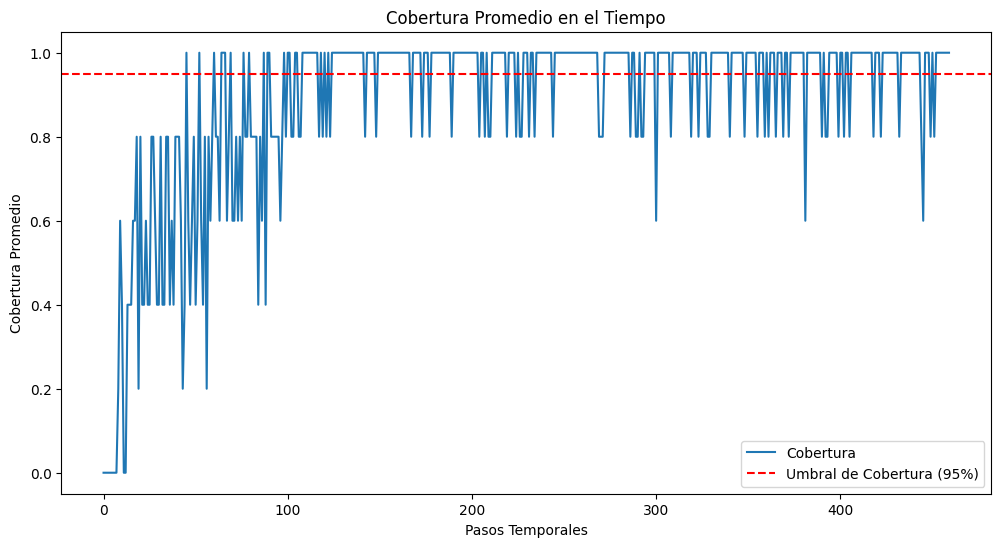

In [189]:
plot_logs_agg(aggregate_logs_average(logs))

In [190]:
calib_metrics = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha
)
calib_metrics

,Group,Marginal Coverage,Coverage Deviation,Average Region Size,Winkler Score
0,Global,0.949086,-0.000914,39.538171,48.386986
